# 01. Wstęp do matematyki - zajęcia wstępne


Treści kształcenia. Podczas tych zajęć student zapoznaje się z przeglądem tematów oraz zagadnień, z którymi będzie się stykał podczas zajęć z przedmiotu.

Efekty kształcenia. Zapoznanie się z przykładowymi problemami matematycznymi, które mają związek z informatyką. Student zapoznaje się z metodą problemową pracy nad zagadnieniami matematycznymi w informatyce.

# Wstęp

Niniejszy plik jest pierwszym z trzydziestu scenariuszy zajęć przygotowanych na przedmiot Wstęp do matematyki na kierunku Informatyka na studiach inżynierskich. 

Celem tego przedmiotu jest przekazanie studentom fundamentalnych pojęć z zakresu matematyki, które mają swoje odzwierciedlenie w pracy informatyka. Tematy te obejmują zagadnienia takie jak
* podstawy języka matematyki, w tym wysławianie pojęć matematycznych i ich właściwości w formie definicji oraz twierdzeń; przeprowadzanie formalnych rozumowań matematycznych (dowód)
* podstawy teorii zbiorów, operowania funkcjami
* arytmetyka liczb, w tym liczby całkowite, wymierne, rzeczywiste i zespolone
* pojęcie indukcji matematycznej, rekurencji i rekursji
* odwzorowania w matematyce - funkcje
* podstawowe zagadnienia z geometrii analitycznej
* ciągi liczbowe
* wielomiany
* metryki

Aby przybliżyć styl pracy na zajęciach i sposób wprowadzania zagadnień poniżej został przygotowany wybór pięciu krótkich ćwiczeń do omówienia w ramach zajęć wstępnych.

1. [O pierwiastku kwadratowym](#O-pierwiastku-kwadratowym)
2. [Liczby Fibonacciego](#Liczby-Fibonacciego)
3. [Zagadka Hanoi](#Zagadka-Hanoi)
4. [Tajemnicze obrazki](#Tajemnicze-obrazki)
5. [Gra w monety](#Gra-w-monety)

# O pierwiastku kwadratowym

W jaki sposób wyznaczyć 10 cyfr dziesiętnych liczby $\sqrt{2}$? A 100, 1000, 10000? Czy da się to zrobić szybko, np. w ciągu 1/10 sekundy?

Algorytm I:

$2,0 = 200/100$

$14^2 = 196<200<225=15^2$

$14^2/10^2 < 2,0<15^2/10^2$

$1,4<\sqrt{2}<1,5$

Jak znaleźć najwiekszy kwadrat niewiększy od 20000? Będzie to liczba niemniejsza niż $140$ i niewiększa niż $150$.

Zatem przeszukujemy zbiór liczb całkowitych $\{141,142,143,144,145,146,147,148,149\}$.

Jak? Najlepiej binarnie, czyli zaczynając w połowie, w tym przypadku

> $149^2=22201$ (za dużo!)

Wybieramy więc element w połowie

> $144^2=20736$ (za dużo)

Sprawdzamy

> $142^2=20164$ (za dużo)

Ostatecznie

> $141^2=19881$



Potrzeba zatem przeszukać w każdej iteracji następujące zbiory:

1. $\{11,\ldots 19\} \rightarrow 14$
2. $\{141,\ldots 149\} \rightarrow 141$
3. $\{1411,\ldots 1419\} \rightarrow 1414$
4. ...


Do przygotowania algorytmu potrzebujemy jeszcze procedurę, która dla zadanej liczby naturalnej $n$ znajduje największą liczbę $k$, której kwadrat $k^2$ jest niewiększy od $n$.

> $k\leftarrow 1$
>
> $sq\leftarrow 1$
>
> `while` ($sq\leq n$)
>
>> $sq\leftarrow sq+2k+1$
>>
>> $k\leftarrow k+1$
>>
> `return` $k-1$

Zauważmy, że w powyższej procedurze nie podnosimy żadnego elementu do kwadratu!

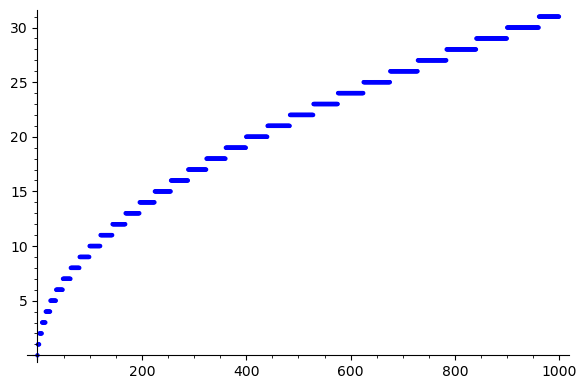

In [24]:
#największa liczba całkowita k spełniająca k^2<=n
def NajwKwadrat(n):
    k=1
    sq=1
    while(sq<=n):
        sq+=(k<<1) # w implementacji wykorzystujemy przesunięcie bitowe zamiast mnożenia przez 2
        sq+=1
        k+=1
    return k-1
    
list_plot([NajwKwadrat(n) for n in range(0,1000)])

Możemy zatem przystąpić do zapisania procedury obliczania pierwiastka kwadratowego z wybranej liczby $x$. Procedura zwraca generator `a=SzukPierw(x)`, który przy wywołaniu `next(a)` oblicza kolejne przybliżenie $\sqrt{x}$ przybliżone o kolejną cyfrę dziesiętną. Komenda zwraca liczby całkowite (cyfry liczby $\sqrt{x}$).

In [27]:
def SzukPierw(x):
    val10=x
    val=NajwKwadrat(x)
    if val^2==x:
        yield val
    while True:
        val=val*10
        li=range(val+1,val+10)
        val10=val10*100
        #przeszukanie binarne
        if li[4]^2<val10:
            if li[6]^2<val10:
                if li[7]^2<val10:
                    if li[8]^2<val10:
                        yield li[8]
                        val=li[8]
                    else:
                        yield li[7]
                        val=li[7]
                else:
                    yield li[6]
                    val=li[6]
            else:
                if li[5]^2<val10:
                    yield li[5]
                    val=li[5]
                else:
                    yield li[4]
                    val=li[4]
        else:
            if li[1]^2<val10:
                if li[2]^2<val10:
                    if li[3]^2<val10:
                        yield li[3]
                        val=li[3]
                    else:
                        yield li[2]
                        val=li[2]
                else:
                    yield li[1]
                    val=li[1]
            else:
                if li[0]^2<val10:
                    yield li[0]
                    val=li[0]
                else:
                    yield val

### Interesujące pierwiastki

Wyznacz kilka przybliżeń pierwiastka kwadratowego z liczb

$99,9999,999999,99999999,\ldots$

Czy zauważasz interesującą **regularność**?

Podobnie przeanalizuj przybliżęnia dziesiętne pierwiastków kwadratowych z liczb
* $1,123,12345,1234567,123456789,1234567891011,\ldots$
* $1,101,10001,1000001,100000001,\ldots$

Zastanów się jakie interesujące ciągi liczbowe odpowiadałyby podanym powyżej, gdybyśmy obliczali pierwiastek kwadratowy w innej bazie pozycyjnej, np. binarnej.

In [29]:
a=SzukPierw(2)
[next(a) for i in range(50)]

[14,
 141,
 1414,
 14142,
 141421,
 1414213,
 14142135,
 141421356,
 1414213562,
 14142135623,
 141421356237,
 1414213562373,
 14142135623730,
 141421356237309,
 1414213562373095,
 14142135623730950,
 141421356237309504,
 1414213562373095048,
 14142135623730950488,
 141421356237309504880,
 1414213562373095048801,
 14142135623730950488016,
 141421356237309504880168,
 1414213562373095048801688,
 14142135623730950488016887,
 141421356237309504880168872,
 1414213562373095048801688724,
 14142135623730950488016887242,
 141421356237309504880168872420,
 1414213562373095048801688724209,
 14142135623730950488016887242096,
 141421356237309504880168872420969,
 1414213562373095048801688724209698,
 14142135623730950488016887242096980,
 141421356237309504880168872420969807,
 1414213562373095048801688724209698078,
 14142135623730950488016887242096980785,
 141421356237309504880168872420969807856,
 1414213562373095048801688724209698078569,
 14142135623730950488016887242096980785696,
 1414213562373095048

In [80]:
a=SzukPierw(999999)
[next(a) for i in range(50)]

[9999,
 99999,
 999999,
 9999994,
 99999949,
 999999499,
 9999994999,
 99999949999,
 999999499999,
 9999994999998,
 99999949999987,
 999999499999874,
 9999994999998749,
 99999949999987499,
 999999499999874999,
 9999994999998749999,
 99999949999987499993,
 999999499999874999937,
 9999994999998749999374,
 99999949999987499993749,
 999999499999874999937499,
 9999994999998749999374999,
 99999949999987499993749996,
 999999499999874999937499960,
 9999994999998749999374999609,
 99999949999987499993749996093,
 999999499999874999937499960937,
 9999994999998749999374999609374,
 99999949999987499993749996093747,
 999999499999874999937499960937472,
 9999994999998749999374999609374726,
 99999949999987499993749996093747265,
 999999499999874999937499960937472656,
 9999994999998749999374999609374726562,
 99999949999987499993749996093747265622,
 999999499999874999937499960937472656229,
 9999994999998749999374999609374726562294,
 99999949999987499993749996093747265622949,
 999999499999874999937499960937

In [50]:
a=SzukPierw(10001)
[next(a) for i in range(40)]

[1000,
 10000,
 100004,
 1000049,
 10000499,
 100004999,
 1000049998,
 10000499987,
 100004999875,
 1000049998750,
 10000499987500,
 100004999875006,
 1000049998750062,
 10000499987500624,
 100004999875006249,
 1000049998750062496,
 10000499987500624960,
 100004999875006249609,
 1000049998750062496094,
 10000499987500624960940,
 100004999875006249609402,
 1000049998750062496094023,
 10000499987500624960940234,
 100004999875006249609402341,
 1000049998750062496094023416,
 10000499987500624960940234169,
 100004999875006249609402341699,
 1000049998750062496094023416993,
 10000499987500624960940234169937,
 100004999875006249609402341699379,
 1000049998750062496094023416993798,
 10000499987500624960940234169937986,
 100004999875006249609402341699379869,
 1000049998750062496094023416993798697,
 10000499987500624960940234169937986972,
 100004999875006249609402341699379869721,
 1000049998750062496094023416993798697215,
 10000499987500624960940234169937986972154,
 100004999875006249609402341699

In [87]:
[sqrt(99).n(250),sqrt(9999).n(250),sqrt(999999).n(250),sqrt(99999999).n(250),sqrt(9999999999).n(250)] #wyjaśnij!

[9.9498743710661995473447982100120600517812656367680607911760464383494539278,
 99.994999874993749609347654199057604094367888213731064901342816897727103303,
 999.99949999987499993749996093747265622949217138670565794807433154677543830,
 9999.9999499999998749999993749999960937499726562497949218733886718619079589,
 99999.999994999999999874999999993749999999609374999972656249997949218749839]

# Liczby Fibonacciego

Jednym z najczęściej wykorzystywanych algorytmów w obliczeniach na liczbach całkowitych jest obliczanie największego wspólnego dzielnika dwóch liczb całkowitych $m$ i $n$, oznaczanego jako $NWD(m,n)$ (ang. $GCD(m,n)$). 

Największy wspólny dzielnik spełnia kilka prostych własności:
> 1. $NWD(0,n) = |n|$, gdy $n\neq0$.
> 2. $NWD(m,n)=NWD(n,m)$.
> 3. $NWD(m,n)=NWD(|m|,|n|)$.

oraz kluczową __własność Euklidesa__ $NWD(m,n)=NWD(m,n-q\cdot m)$ dla dowolnej liczby całkowitej $q$.

Własności $1-3$ oraz własność Euklidesa pozwalają obliczyć największy wspólny dzielnik bez korzystania z faktoryzacji liczb na czynniki pierwsze!

W praktyce zatem otrzymujemy prosty program.

In [1]:
def NWD(a,b):
    dzielna = a
    dzielnik = b
    while dzielnik != 0:   # znak != oznacza, że liczba jest różna od zero
        iloraz = dzielna // dzielnik #(całkowitoliczbowe dzielenie bez reszty)
        reszta = dzielna % dzielnik #(reszta z dzielenia)
        print("%d = %d (%d) + %d"%(dzielna, iloraz, dzielnik, reszta))
        dzielna = dzielnik
        dzielnik = reszta
    return abs(dzielna)

In [2]:
NWD(13,11)

13 = 1 (11) + 2
11 = 5 (2) + 1
2 = 2 (1) + 0


1

In [3]:
NWD(129,131)

129 = 0 (131) + 129
131 = 1 (129) + 2
129 = 64 (2) + 1
2 = 2 (1) + 0


1

Traktując algorytm dzielenia z resztą jako jedną operację (sprawdź, że taki algorytm istotnie istnieje!), możemy obliczyć ile kroków wymaganych jest do obliczenia NWD dwóch liczb. W szczególności interesuje nas najgorszy przypadek przebiegu tego algorytmu.

In [5]:
def NWDLiczKroki(a,b):
    dzielna = a
    dzielnik = b
    c=0
    while dzielnik != 0:   # znak != oznacza, że liczba jest różna od zero
        iloraz = dzielna // dzielnik #(całkowitoliczbowe dzielenie bez reszty)
        reszta = dzielna % dzielnik #(reszta z dzielenia)
        dzielna = dzielnik
        dzielnik = reszta
        c+=1
    return c,abs(dzielna)

Wygenerujemy tablicę par liczb całkowitych $0 < a < b$ i zaobserwujemy dla jakich najmniejszych par liczb $(a,b)$ po raz pierwszy algorytm wykonuje się w $k$ krokach. 

In [41]:
li=sorted([[NWDLiczKroki(a,b)[0],(a,b)] for a in range(1,1000) for b in range(a+1,1000)])
li[-10:] #końcowka listy

[[14, (542, 885)],
 [14, (545, 882)],
 [14, (545, 883)],
 [14, (546, 883)],
 [14, (547, 882)],
 [14, (547, 885)],
 [14, (555, 877)],
 [14, (555, 898)],
 [14, (610, 843)],
 [15, (610, 987)]]

In [38]:
[sorted([x[1] for x in li if x[0]==k])[0] for k in range(2,15)]

[(1, 2),
 (2, 3),
 (3, 5),
 (5, 8),
 (8, 13),
 (13, 21),
 (21, 34),
 (34, 55),
 (55, 89),
 (89, 144),
 (144, 233),
 (233, 377),
 (377, 610)]

Zatem najmniejsza para liczb $(a_k,b_k)$ dla której wykonanie algorytmu Euklidesa zajmuje $k$ kroków spełnia (hipotetycznie) pewną ciekawą własność

> $a_{k+1}=b_{k}$ oraz $a_{k}+b_{k} = b_{k+1}$

Łącząc obie równości otrzymujemy relacje

> $a_{k}+a_{k+1} = a_{k+2}$ 

oraz

> $b_{k-1}+b_{k} = b_{k+1}$.



Dla pary $(0,1)$ algorytm wykonuje się w zero krokach (z definicji). Dla pary $(1,1)$ algorytm kończy się po 1 kroku. W ten sposób otrzymujemy zależność

> $a_{0}=0$, $a_{1}=1$

oraz

> $a_{k}+a_{k+1} = a_{k+2}$.

**Zadanie**

Sprawdź, że $NWD(a_{k},a_{k+1}) = 1$ dla dowolnego indeksu $k$. Ponadto uzasadnij, że algorytm Euklidesa potrzebuje $k$ kroków do obliczenia $NWD(a_{k},a_{k+1})$.

Jak szybko rosną liczby $a_k$ zadane powyższym wzorem?

In [50]:
def a(k):
    if k==0:
        return 0
    if k==1:
        return 1
    if k>1:
        u=0
        v=1
        for i in range(k): #metoda iteracyjna jest szybsza niż obliczanie z definicji rekurencyjnej!
            u,v=v,u+v
    return u

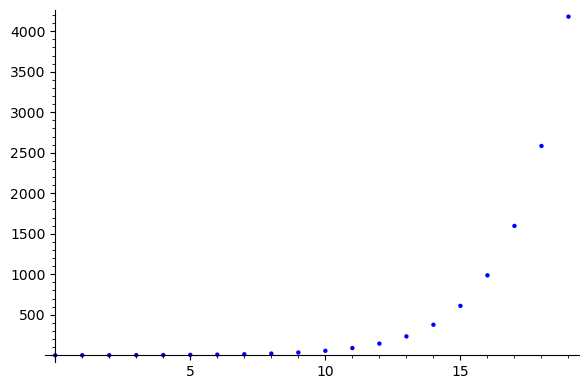

In [55]:
list_plot([a(n) for n in range(0,20)])

Wykres przypomina szybko rosnącą funkcję. Czy jest to funkcja mniej więcej postaci $a^n$ dla pewnego $a>1$?

In [58]:
[a(n+1)/a(n)*1.0 for n in range(1,50)]

[1.00000000000000,
 2.00000000000000,
 1.50000000000000,
 1.66666666666667,
 1.60000000000000,
 1.62500000000000,
 1.61538461538462,
 1.61904761904762,
 1.61764705882353,
 1.61818181818182,
 1.61797752808989,
 1.61805555555556,
 1.61802575107296,
 1.61803713527851,
 1.61803278688525,
 1.61803444782168,
 1.61803381340013,
 1.61803405572755,
 1.61803396316671,
 1.61803399852180,
 1.61803398501736,
 1.61803399017560,
 1.61803398820532,
 1.61803398895790,
 1.61803398867044,
 1.61803398878024,
 1.61803398873830,
 1.61803398875432,
 1.61803398874820,
 1.61803398875054,
 1.61803398874965,
 1.61803398874999,
 1.61803398874986,
 1.61803398874991,
 1.61803398874989,
 1.61803398874990,
 1.61803398874989,
 1.61803398874990,
 1.61803398874989,
 1.61803398874989,
 1.61803398874989,
 1.61803398874989,
 1.61803398874989,
 1.61803398874989,
 1.61803398874989,
 1.61803398874989,
 1.61803398874989,
 1.61803398874989,
 1.61803398874989]

Ilorazy kolejnych wyrazów ciągu $a_k$ zdają się stabilizować na liczbie mniej więcej $1,6180339...$.

In [71]:
[a(n)/(1.618033^n) for n in range(1,100)] #ilorazy stabilizują się na liczbie około 0,47240

[0.618034366418979,
 0.381966478074909,
 0.472136820540630,
 0.437695171118850,
 0.450851096278475,
 0.445826354620431,
 0.447746013992422,
 0.447013146581771,
 0.447293454865383,
 0.447186764234105,
 0.447227894125267,
 0.447212561566820,
 0.447218795758445,
 0.447216792179766,
 0.447217935151505,
 0.447217876247428,
 0.447218276419574,
 0.447218501240330,
 0.447218793039628,
 0.447219059255615,
 0.447219335243794,
 0.447219607499557,
 0.447219881181207,
 0.447220154318447,
 0.447220427663864,
 0.447220700929996,
 0.447220974226643,
 0.447221247511864,
 0.447221520801681,
 0.447221794089973,
 0.447222067379078,
 0.447222340668104,
 0.447222613957390,
 0.447222887246808,
 0.447223160536406,
 0.447223433826167,
 0.447223707116096,
 0.447223980406191,
 0.447224253696454,
 0.447224526986884,
 0.447224800277480,
 0.447225073568244,
 0.447225346859175,
 0.447225620150272,
 0.447225893441537,
 0.447226166732969,
 0.447226440024568,
 0.447226713316333,
 0.447226986608266,
 0.447227259900366,


## Ryzykowna hipoteza

Zatem ciąg liczb $a_k$ jest bardzo bliski ciągowi $0,447240\cdot (1,618033)^k$.

Co to znaczy _bliski_?

__Hipoteza robocza:__

Jeśli element $a_k$ byłby postaci $A\cdot b^k$ to wówczas, aby spełniać równanie $a_{k+2} = a_{k+1}+a_{k}$ potrzebowalibyśmy

$$A\cdot b^{k+2} = A\cdot b^{k+1}+A\cdot b^{k}.$$

Zakładając, że $A\neq 0$ oraz $b\neq 0$, otrzymujemy

$$b^2=b+1.$$

Jakie są rozwiązania równania kwadratowego $b^2=b+1$?

In [73]:
b=var('b')
solve(b^2-b-1==0,b)

[b == -1/2*sqrt(5) + 1/2, b == 1/2*sqrt(5) + 1/2]

In [1]:
print((-1/2*sqrt(5) + 1/2).n())

-0.618033988749895


Liczba $1/2\sqrt{5}+1/2$ to mniej więcej $1,618033...$. Z kolei liczba $-1/2\sqrt{5}+1/2$ to około $-0,61803...$. Wygląda na to, że nasza hipoteza nie jest pozbawiona sensu. Ale ile wynosi stała $A$?

> Zauważ, że liczby $a_k$ są całkowite. Czy istnieje stała $A$ spełniająca dokładnie równość $A(1/2\sqrt{5} + 1/2)^k = a_k$? (odpowiedź: sprawdź, że nie może tak być!)

Zatem pozostaje inna opcja. Istnieją dwie stałe $A_1, A_2$ takie, że

> $a_k = A_1 (1/2\sqrt{5} + 1/2)^k+A_2(-1/2\sqrt{5} + 1/2)^k$.

**Zadanie:**

Uzasadnij, że stała $A_1=-A_2=1/\sqrt{5}$ i równość powyżej zachodzi wówczas dla dowolnego $k\geq 0$.

### Komentarz

Ciąg liczbowy $(a_k)$ określony wzorem powyżej nosi nazwę ciągu Fibonacciego od nazwiska Leonarda z Pizy zwanego Fibonaccim, który jako pierwszy omawiał własności tego ciągu w księdze _Liber abaci_  w 1202 roku.

Formuła 

$$a_k = \frac{1}{\sqrt{5}}\left( \left(\frac{1+\sqrt{5}}{2}\right)^k- \left(\frac{1-\sqrt{5}}{2}\right)^k \right)$$

nosi nazwę _formuły Bineta_ od nazwiska Jaquesa Bineta, który podał ją w 1843 roku. Najwcześniejsza wzmianka tej formuły pochodzi z pracy Abrahama de Moivre'a z 1722 roku i była wielokrotnie odkrywana przez innych autorów.

__Literatura:__
* Binet, J. P. (1843). Mémoire sur l’intégration des équations linéaires aux différences finies, d’un ordre quelconque, à coefficients variables. Comptes Rendus hebdomadaires des séances de l’Académie des Sciences (Paris), 17, 559-567.
* Bernoulli, D. (1728). Comment. Acad. Sci. Petrop., 3, 85-100.
* Euler, L. (1765). Observationes analyticae. Novi commentarii ascaemiae scientiarum imperialis Petropolotanae, 11, 124-143.
* de Moivre, A. (1730). Miscellanea analytica de seriebus et quadraturis . London.
* de Moivre, A. (1722). Philos. Trans., 32, 162-178.

Link do ciekawej [dyskusji na ten temat](https://hsm.stackexchange.com/questions/2067/with-what-kind-of-proof-was-the-binet-formula-derived-for-the-first-time).

---

#  Zagadka Hanoi

Matematyka to nauka o rozkładaniu skomplikowanych problemów na trywialne kroki. Tak mógłby wyglądać wstęp do każdego podręcznika matematycznego. 
Dla laika wydaje się to niemożliwym patrząc na skomplikowane gmachy wiedzy abstrakcyjnej zbudowane przez matematyków. Z drugiej strony budowa katedry polega tak jak budowa wieży z kart na konsekwentnym łączeniu prostych elementów, aż do powstania finalnego dzieła.

> W informatyce podejście do problemów polegające na ich rozłożeniu na prostsze podproblemy nosi nazwę ,,dziel i rządź'' (ang. [divide and conquer](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm)). Podejście to zaowocowało budową wspaniałych algorytmów takich jak **algorytm Strassena** czy **algorytm Karacuby** do mnożenia dowolnie dużych liczb całkowitych na komputerze, algorytmów sortowania, np. **quicksort** lub **mergesort** czy wreszcie rozwiązywania skomplikowanych łamigłówek matematycznych, np. problem **wież Hanoi**. Każdy z tych algorytmów ma pewien związek z zasadą **indukcji matematycznej**, o której będziemy się uczyli na jednych z kolejnych zajęć. W tym przykładzie przyjrzymy się w uproszczony sposób problemowi wież Hanoi i jak go rozwiązać metodą *dziel i rządź*.

## Problem wież Hanoi

Wyobraźmy sobie, że mamy do dyspozycji trzy drewniane paliki. Na każdy z nich możemy nałożyć jeden z $n$ dostępnych klocków (o $n$ różnych szerokościach).
Klocki możemy przekładać między palikami, ale tylko w ten sposób, aby klocek węższy był nakładany na klocek szerszy. Zakładamy, że na pusty palik można nałożyć klocek dowolnej szerokości.

Zadanie polega na **zgodnym z regułami** przełożeniu wszystkich $n$ klocków ułożonych od najszerszego do najwęższego z palika pierwszego na palik trzeci. Numerujemy paliki: $1$ - palik lewy, $2$ - palik środkowy oraz $3$ - palik prawy.

Pytanie: w ilu krokach i czy w ogóle można rozwiązać to zadanie?



Idea *dziel i rządź* dla tego zadania polega na tym, aby zastanowić się czy problem można rozwiązać odwołując się do jego mniejszej wersji.

W przypadku, gdy mamy $n=1$ klocek, wówczas przełożenie go z pierwszego palika na trzeci odbywa się **jednym** legalnym ruchem.

Gdy liczba klocków wzrasta do $n=2$, wówczas najprostszy sposób rozwiązania polega na przełożeniu klocka z góry na palik środkowy, klocka z dołu na palik prawy, w końcu przekładamy klocek mniejszy z palika $2$ na palik $3$. I gotowe, w **trzech** krokach osiągnęliśmy cel.

Co dzieje się, gdy mamy $n=3$ klocki? Zastosujemy podejście **abstrakcyjne**. Wyobrażamy sobie, że klocek środkowy i górny stanowią **całość**, jeden superklocek, nazwijmy do $\alpha$. Klocek dolny oznaczmy $\beta$. Sprowadzamy zatem, zgodnie z zasadą *dziel i rządź* zadanie do problemu *dwóch* klocków, $\alpha$ i $\beta$. Taki algorytm już znamy z poprzedniego kroku! Zatem odpowiednio:

> 1. Przekładamy $\alpha$ na palik $2$.
> 2. Przekładamy $\beta$ na palik $3$.
> 3. Przekładamy $\alpha$ na palik $3$.

W jaki sposób *przekładamy* $\alpha$ na inny palik? Wykonujemy ciąg operacji podobny do algorytmu dla dwóch *rzeczywistych* klocków, traktując klocek $\beta$ jakby był elementem podłoża. I gotowe!

W ten sposób rozwiązujemy nasze zadanie dla $n=3$ w $7$ krokach. Ile kroków zajmie nam rozwiązanie zadania dla $n=4$? A ile w ogólności?



In [45]:
def Rozkaz(i,j):
    return "Przełóż klocek z palika %d na palik %d.\n"%(i,j)
def AlgorytmHanoi(n,paliki):
    if n==1:
        start,pomoc,koniec=paliki
        return Rozkaz(start,koniec)
    if n==2:
        start,pomoc,koniec=paliki
        str1=Rozkaz(start,pomoc)
        str2=Rozkaz(start,koniec)
        str3=Rozkaz(pomoc,koniec)
        return str1+str2+str3
    if n>2:
        algbeta=AlgorytmHanoi(n-1,[1,3,2])
        algalfa=Rozkaz(1,3)
        algbeta2=AlgorytmHanoi(n-1,[2,1,3])
        return algbeta+algalfa+algbeta2

In [52]:
alg=AlgorytmHanoi(4,[1,2,3]).split("\n")[:-1]
print(''.join([x[0]+". "+x[1]+"\n" for x in zip(map(str,range(1,len(alg)+1)),alg)]))

1. Przełóż klocek z palika 1 na palik 3.
2. Przełóż klocek z palika 1 na palik 2.
3. Przełóż klocek z palika 3 na palik 2.
4. Przełóż klocek z palika 1 na palik 3.
5. Przełóż klocek z palika 2 na palik 1.
6. Przełóż klocek z palika 2 na palik 3.
7. Przełóż klocek z palika 1 na palik 3.
8. Przełóż klocek z palika 1 na palik 3.
9. Przełóż klocek z palika 1 na palik 3.
10. Przełóż klocek z palika 1 na palik 2.
11. Przełóż klocek z palika 3 na palik 2.
12. Przełóż klocek z palika 1 na palik 3.
13. Przełóż klocek z palika 2 na palik 1.
14. Przełóż klocek z palika 2 na palik 3.
15. Przełóż klocek z palika 1 na palik 3.



In [1]:
########################################
#Kod pomocniczy do generowania obrazków#
########################################
#funkcje pomocnicze - rysowanie
def rect(pt,dl,szer,kolor):
    return polygon([vector(pt)+x for x in [vector([0,0]),vector([dl,0]),vector([dl,szer]),vector([0,szer])]],color=kolor,axes=false,edgecolor=kolor,thickness=0)

def krazek(sr,dl,szer,kolor):
    prost=rect([sr[0]-dl/2,sr[1]-szer/2],dl,szer,kolor)
    prawy=disk((sr[0]+dl/2,sr[1]), szer/2, (-1/2*pi, 1/2*pi),color=kolor,thickness=0,zorder=3)
    lewy=disk((sr[0]-dl/2,sr[1]), szer/2, (1/2*pi, 3/2*pi),color=kolor,thickness=0,zorder=3)
    return lewy+prawy+prost

#rysowanie układu wież Hanoi
def StanHanoi(N,krazki,kolory):
    odl=N+2
    gra=Graphics()
    krazki1=krazki[0]
    krazki2=krazki[1]
    krazki3=krazki[2]
    refkra=krazek([0,-(N)*0.5],N,0.5,'white')+krazek([0+odl,-(N)*0.5],N,0.5,'white')+krazek([0+2*odl,-(N)*0.5],N,0.5,'white')
    
    gra=gra+sum([krazek([0,-(N-n)*0.5],krazki1[n],0.5,kolory[krazki1[n]]) for n in range(len(krazki1))])
    palik1=rect([-0.25,-(N/2+0.25)],0.5,N/2+0.5,'brown')
    gra=palik1+gra
    
    palik2=rect([-0.25+odl,-(N/2+0.25)],0.5,N/2+0.5,'brown')
    gra=palik2+gra
    gra=gra+sum([krazek([0+odl,-(N-n)*0.5],krazki2[n],0.5,kolory[krazki2[n]]) for n in range(len(krazki2))])
    
    palik3=rect([-0.25+2*odl,-(N/2+0.25)],0.5,N/2+0.5,'brown')
    gra=palik3+gra
    gra+=sum([krazek([0+2*odl,-(N-n)*0.5],krazki3[n],0.5,kolory[krazki3[n]]) for n in range(len(krazki3))])
    
    return refkra+gra

#funkcja modyfikacji stanu gry
#stan = [[<dlugosci krazkow na palu 1>],[<dlugosci krazkow na palu 2>],[<dlugosci krazkow na palu 3>]]
def przenies(stan,i,j):
    x=stan[i-1].pop()
    stan[j-1].append(x)
    return stan

#rozkaz przeniesienia krazka z palika i na j
def RozkazLista(i,j):
    return [(i,j)]

#algorytm przenoszenia wież z palika startowego na końcowy, z wykorzystaniem palika pomocniczego
#algorytm rekurencyjny
def AlgorytmHanoiLista(n,paliki):
    if n==1:
        start,pomoc,koniec=paliki
        return RozkazLista(start,koniec)
    if n==2:
        start,pomoc,koniec=paliki
        str1=RozkazLista(start,pomoc)
        str2=RozkazLista(start,koniec)
        str3=RozkazLista(pomoc,koniec)
        return str1+str2+str3
    if n>2:
        start,pomoc,koniec=paliki
        algbeta=AlgorytmHanoiLista(n-1,[start,koniec,pomoc])
        algalfa=RozkazLista(start,koniec)
        algbeta2=AlgorytmHanoiLista(n-1,[pomoc,start,koniec])
        return algbeta+algalfa+algbeta2
    
    
#przykład wyświetlania przebiegu gry dla wybranej liczby krążków
#UWAGA: przy wyborze N>7 należy dodać proponowane kolory kolejnych palików
N=4
kolory={1:'red',2:'green',3:'blue',4:'cyan',5:'magenta',6:'yellow',7:'black'}
alg=AlgorytmHanoiLista(N,[1,2,3])
#print(alg)

stan=[list(range(N,0,-1)),[],[]]
grali=[]

for rozkaz in alg:
    #print(stan) #możliwość wydruku stanu
    grali.append(StanHanoi(N,stan,kolory))
    przenies(stan,rozkaz[0],rozkaz[1])
#print(stan)
grali.append(StanHanoi(N,stan,kolory))    

Zobaczmy efekty wykonywania instrukcji przekładania klocków wież Hanoi na przykładzie wieży złożonej z czterech krążków.

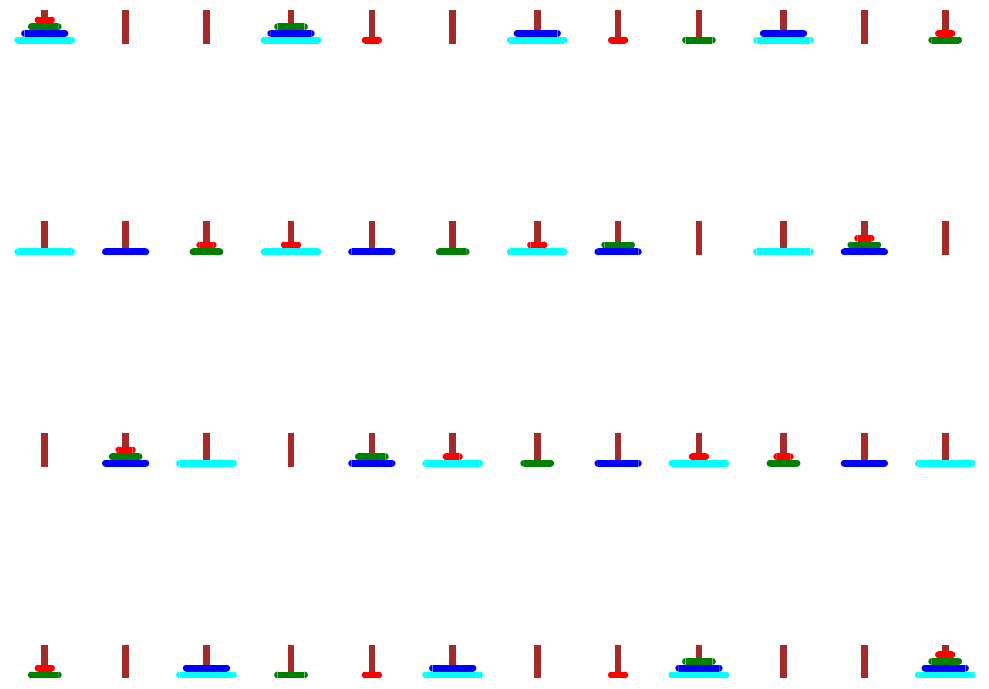

In [4]:
gg=graphics_array(grali,ncols=4)
gg.show(figsize=[10,10])

Aplet graficzny - sprawdź samodzielnie czy dobrze rozumiesz algorytm

In [5]:
@interact
def _(krok=slider(range(len(grali)))):
    grali[krok].show(figsize=[8,5])

Interactive function <function _ at 0x7f4bd4453d90> with 1 widget
  krok: SelectionSlider(description='krok', …

# Tajemnicze obrazki

Wyobraźmy sobie grę, w której podajemy dwie liczby,np. $\{0,1\}$ i następnie generujemy dla tych liczb przekształcenie, np. $x\mapsto x/2$, którym działamy na każdy element ze zbioru. 

Następnie łączymy oryginalny zbiór z nowym zbiorem, w tym przypadku $\{0,1/2,1\}$. 

W kolejnym kroku powtarzamy operację, ale już na nowym zbiorze. W efekcie w kolejnych krokach otrzymamy zbiory

> $\{0,1\}$ 

> $\{0,1/2,1\}$ 

> $\{0,1/4,1/2,1\}$ 

> $\ldots$ 

>> _Czy istnieje ,,koniec'' takiej gry? Jeśli tak, to jakie własności ma taki zbiór?_

Przypadek powyżęj sugeruje następującą odpowiedź:

$\{0,1/2,1/4,1/8,1/16,\ldots\}$ 

czyli $0$ wraz z kolejnymi potęgami liczby $1/2$. Operacja, którą wykonywaliśmy na zbiorach może być opisana następująco

$W(A) = A\cup f(A)$ 

gdzie $f(A)$ oznacza zbiór elementów z $A$ pomnożonych przez $1/2$. Symbol $\cup$ to połączenie \(suma\) dwóch zbiorów.

> Jeśli przez $A_0$ oznaczymy zbiór $\{0,1\}$ oraz $A_i = W(A_{i-1})$ to zbiór, który otrzymujemy \`\`na końcu'' możemy oznaczyć $A_\infty = \{0,1/2,1/4,\ldots\}$. Jego własnością jest $A_\infty = W(A_\infty)$.



__UWAGA:__ w pewnym ścisłym sensie \(związanym np. z metryką Hausdorffa, czyli miarą odległości zbiorów\) odwzorowanie $W$ ma punkt stały $A_\infty$, do którego nasz proces zbiega. Własności zbiorów podobnych do $A_\infty$ są tematem bardzo ciekawych badań, a odwzorowania podobne do $W$ \(tzw. operatory Hutchinsona\) są tematem badań w zakresie tzw. iterowanych systemów funkcji. Zbiór $A_\infty$ jest samo\-podobny \(tutaj: przeskalowanie zbioru $A_\infty$ o połowę daje ten sam zbiór \- $f(A_\infty) = A_\infty$ \).

W niektórych zastosowaniach zbiory podobne do $A_\infty$ nazywamy **fraktalami**. W poniżej podanych kilku prostych przykładach zapoznasz się z przykładami fraktali, które powstają w wyniku zastosowania bardzo prostych operacji na płaszczyźnie.

> Najpierw przygotujemy sobie kod do generowania naszych zbiorów punktów. Elementem startowym dla każdego przykładu będzie punkt $(0,0)$ na płaszczyźnie $\mathbb{R}^{2}$. Ten punkt stanowi zbiór $A_{0}$. Następnie podana będzie lista odwzorowań $f_i:\mathbb{R}^{2}\rightarrow\mathbb{R}^2$, które będą połączeniem obrotów ze skalowaniem i translacjami \(patrz: **operacje afiniczne** \). Ważnym warunkiem jest, aby odwzorowania $f_i$ były **kontrakcjami** \(co to znaczy \- zobacz do wykładów o metrykach!\). Nasza gra opierać się będzie na rysowaniu zbiorów

$W(A) = f_1(A)\cup \ldots f_i(A)\cup\ldots$ 

i odpowiednio $A_1=W(A_0), A_2=W(A_1),\ldots$ 

Zobaczymy na kilku przykładach, że kształt zbiorów $A_i$ ma interesujące własności, m. in. zobaczymy słynny **trójkąt Sierpińskiego** czy **paproć Barnsley'a**.

__Literatura:__

* Peitgen, Jurgens, Saupe, Chaos and Fractals. New Frontiers of Science, Second Edition, Springer 2004: Rozdział 5: ''Encoding Images by Simple Transformations''
* Barnsley, M. F. Fractals Everywhere, Academic Press, 1988
* Hutchinson, J. Fractals and self-similarity, Indiana Journal of Mathematics 30 (1981) 713-747


__Hasła:__
1. IFS = Iterated Function System (Barnsley); some nice examples [here](https://pages.cs.wisc.edu/~ergreen/honors_thesis/IFS.html)
2. MRCM = Multiple Reduction Copy Machine

In [1]:
#IFS: lista = lista funkcji, n = liczba interacji; wynik: plot po n iteracjach
def ifs(lista, n):
    pkty = [(0,0)]
    for _ in range(n):
        pkty2 = []
        for f in lista:
            pkty2 += [f(x, y) for (x, y) in pkty]
        pkty = pkty2
    pts=point(pkty)
    pts.set_aspect_ratio(1)
    pts.show()

## Przykład 1: Trójkąt Sierpińskiego

Przykład bazuje na trzech odwzorowaniach. Jedno to podzielenie obu współrzędnych na pół, odwzorowanie $f_1(x,y) = (x/2,y/2)$ i dwóch pozostałych, które przesuwają punkt $f_1(x,y)$ o $(1/2,0)$ (operacja $f_2$) lub $(0,1/2)$ (operacja $f_3$).

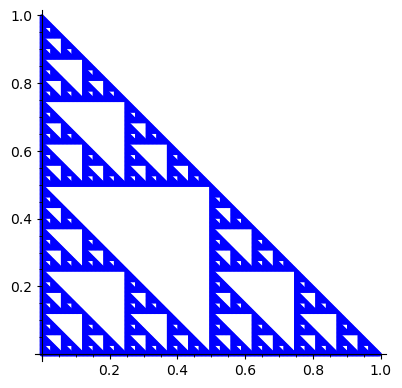

In [2]:
f1(x, y) = (x/2, y/2)
f2(x, y) = (x/2 +1/2, y/2)
f3(x, y) = (x/2, y/2 + 1/2)

lista = [f1, f2, f3]
n = 8
pts=ifs(lista, n)

## Przykład 2: zmodyfikowany trójkąt Sierpińskiego

W tym przykładzie zmieniamy skalowanie do $1/3$. Efekt daje zbiór podobny do poprzedniego, ale pojawiają się łuki, których do tej pory nie było.

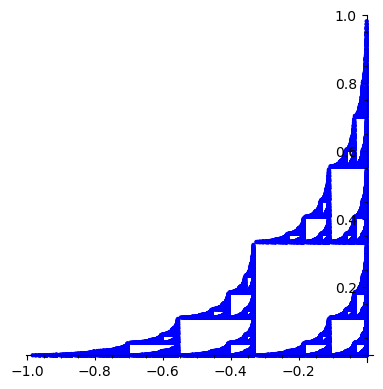

In [2]:
f1(x, y) = (x/3, y/3)
f2(x, y) = (2*x/3 - 1/3, y/3)
f3(x, y) = (x/3, 2*y/3 + 1/3)

lista = [f1, f2, f3]
n = 10
ifs(lista, n)

## Przykład 3: liść klonowy

Kolejny przykład opiera się na czterech odwzorowaniach. Dla uwidocznienia skomplikowanej dynamicznej natury obrazka dodana została zmiana kolorów dla kolejnych narostów oraz zmiana wielkości punktów (najstarsze punkty są największe).

In [63]:
def ifskolory(lista, n):
    pts=Graphics()
    pkty = [(0,0)]
    for i in range(n):
        nowepkt=[]
        for f in lista:
            nowepkt+=[f(x, y) for (x, y) in pkty]
        pkty = nowepkt
        pts=point(nowepkt,color=(1-(i/(n-1)),0,(i/(n-1))^2),size=30*(1.1-(i/(n-1))^3))+pts
    pts.set_aspect_ratio(1)
    pts.show()

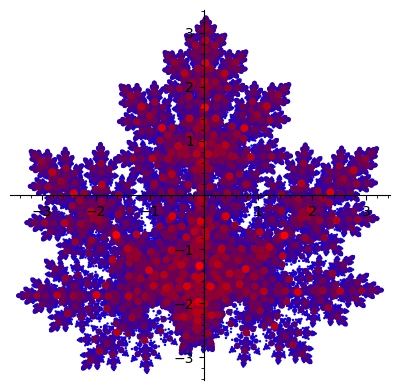

In [79]:
f1(x, y) = (0.14*x+0.01*y -0.08, 0.00*x+0.51*y -1.31)
f2(x, y) = (0.43*x+0.52*y + 1.49, -0.45*x+0.50*y -0.75)
f3(x, y) = (0.45*x+-0.49*y -1.62, 0.47*x+0.47*y -0.74)
f4(x, y) = (0.49*x+0.00*y + 0.02, 0.00*x+0.51*y + 1.62)
lista = [f1, f2, f3, f4]
n = 8
ifskolory(lista, n)

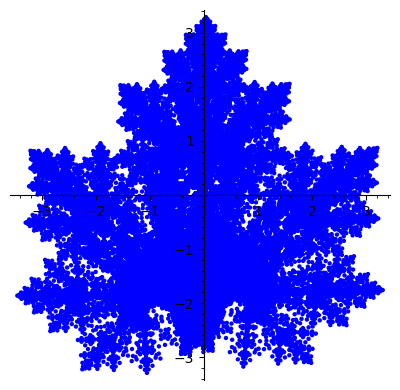

In [80]:
ifs(lista, n)

## Przykład 4: paproć Barnsley'a

W ostatnim przykładzie zobaczymy obraz, który do złudzenia przypomina liść rośliny, np. paproci.

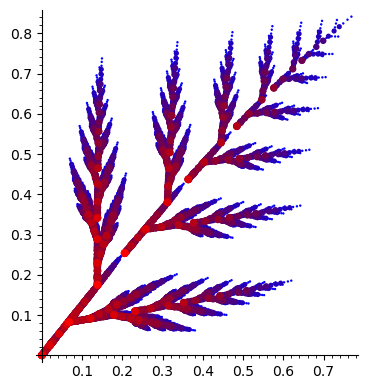

In [73]:
f1(x, y) = (0.0000*x+0.2439*y + 0.0000, 0.0000*x+0.3053*y + 0.0000)
f2(x, y) = (0.7248*x+0.0337*y + 0.2060, -0.0253*x+0.7426*y + 0.2538)
f3(x, y) = (0.1583*x+-0.1297*y + 0.1383, 0.3550*x+0.3676*y + 0.1750)
f4(x, y) = (0.3386*x+0.3694*y + 0.0679, 0.2227*x+-0.0756*y + 0.0826)
lista = [f1, f2, f3, f4]
n = 8
ifskolory(lista, n)

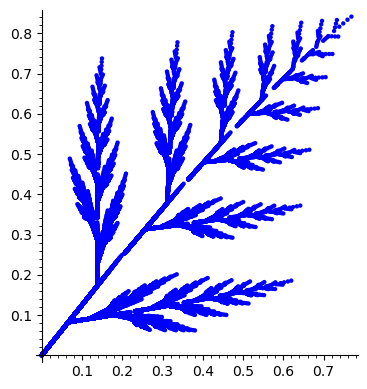

In [74]:
ifs(lista, n)

# Gra w monety
Mamy grę: pierwszy gracz układa w rzędzie 5 monet 1 zł i 2 zł (wzorzec $x$) tak, aby drugi gracz nie widział tego wzorca. Drugi układa swój wzorzec (nazwijmy go $y$) 5 takich monet. 
Jeśli są takie same łańcuch monet, to gracz drugi wygrywa, jeśli nie to gracz pierwszy przekazuje informację o liczbie miejsc w obu łańcuchach, 
które się różnią $d(x,y)$ (liczymy w tym samym kierunku). Oczywiście liczba zero oznacza takie same łańcuchy.


> * Czy zamiana ról graczy jest możliwa, tzn. d(x,y) = d(y,x)?

 
W pojedynczym ruchu gracz drugi może wymienić w swoim wzorcu dowolną monetę 1 zł na 2 zł lub odwrotnie. Ma więc 5 możliwości! Jeśli wymieni różniącą się monetę we wzorcach na
poprawną, to liczba zmaleje o 1, a jeśli nie trafi i wprowadzi kolejną różnicę, to wzrośnie o 1. 

> 1. Określić ile maksymalnie ruchów powinno wystarczyć do wyrównania różnic pomiędzy wzorcami dla każdej z liczby k różnic pozycji (dla n = {1,2,3,4, 5}).
> 2. Zaproponuj taką zmianę reguły podawania wartości d(x,y) (ale to nadal ma być liczba) tak, aby zwiększyć ilość przekazywanych informacji i przyspieszyć grę!

__Komentarz:__

Metryka Hamminga stosowana przy porównywaniu łańcuchów binarnych w informatyce. Proponowane ulepszenie polega na uwzględnieniu w liczbie pozycji, 
na której łańcuch się różnią. Np. zamiast 1 przy różnicy na dowolnej pozycji liczyć $1/2^n$ , gdzie $n$ jest numerem pozycji. 
Rozkładając wynik na potęgi dwójki uzyskamy numery pozycji, w których są różnice (oczywiście inne propozycje też są możliwe...).
Wymiana jest więc ograniczona do $k$ ruchów, gdzie $k$ jest liczbą różniących się pozycji.
> Gdzie znajdzie zastosowanie? Np. porównywanie grafik bitowych, detekcja błędów itp.

In [7]:
def d(s1,s2): #metryka Hamminga
    c=0
    for i in range(len(s1)):
        if s1[i]!=s2[i]:
            c+=1
    return c

## Wykrywanie pozycji pięciu monet

W trakcie gry masz za zadanie odkrycie układu pięciu monet (nominały $1$ i $2$). Monety ułożone są w kolejnosci od lewej do prawej i mogą występować w dowolnej liczbie. 

> Program w każdym kroku podaje odległosć Hamminga do sekretnego układu. W ilu krokach na pewno możesz zakończyć rozgrywkę?

In [11]:
N=5
secret=''.join([choice(['1','2']) for _ in range(N)])
rounds=0
while True:
    st=input()
    if len(st)==N:
        dist=d(st,secret)
        rounds+=1
        print('odległość = '+str(dist))
        if dist==0:
            print('Zwycięstwo!')
            print('Sekret = '+secret)
            print('Liczba rund: '+str(rounds))
            break
    else:
        print('Kod ma długość '+str(N))

 11111  22211 odległość = 2
odległość = 3
 21211 odległość = 1
odległość = 0
Zwycięstwo!
Sekret = 21221
Liczba rund: 5


## Modyfikacja gry

W tym wariancie gry otrzymujesz w każdym kroku listę ustawień, które są w zadanej odległosci od tajnego układu. Czy podpowiedzi skracają Twoja rozgrywkę?

In [4]:
#z małą pomocą...
N=5
allstr=[''.join(x) for x in cartesian_product([['1','2'] for n in range(N)])]
secret=''.join([choice(['1','2']) for _ in range(N)])
rounds=0
used=set()
while True:
    st=input()
    if len(st)==N:
        dist=d(st,secret)
        rounds+=1
        used.add(st)
        print('odległość = '+str(dist))
        if dist==0:
            print('Zwycięstwo!')
            print('Sekret = '+secret)
            print('Liczba rund: '+str(rounds))
            break
        print('Podpowiedzi')
        print([x for x in allstr if (not x in used) and (d(st,x)==dist)])
    else:
        print('Kod ma długość '+str(N))

 21221  22111odległość = 4
Podpowiedzi
['11122', '11212', '11221', '12222', '21222']
 11221odległość = 2
Podpowiedzi
['11111', '11122', '11212', '12121', '12211', '12222', '21121', '21211', '21222', '22221']
 11111  22221  12221odległość = 0
Zwycięstwo!
Sekret = 12222
Liczba rund: 6


## Wariant z ważoną metryką Hamminga

W tej rozgrywce uzyskujesz informację o odległosci od tajnego układu, która jest zadana ważoną metryką. Wagi rozróżniają pozycje. Jak szybko możesz zakończyć rozgrywkę mając daną tak dokładną informację? 
Jak zmieni się sytuacja, gdy niektóre wagi będą równe?

In [8]:
def dw(s1,s2,w): #ważona metryka
    c=0
    for i in range(len(s1)):
        if s1[i]!=s2[i]:
            c+=w[i]
    return c

In [7]:
N=5
secret=''.join([choice(['1','2']) for _ in range(N)])
weight=[1,1/2,1/4,1/8,1/16] #wagi
rounds=0
while True:
    st=input()
    if len(st)==N:
        dist=dw(st,secret,weight)
        rounds+=1
        print('odległość = '+str(dist))
        if dist==0:
            print('Zwycięstwo!')
            print('Sekret = '+secret)
            print('Liczba rund: '+str(rounds))
            break
    else:
        print('Kod ma długość '+str(N))

 12121odległość = 3/16
 12112odległość = 0
Zwycięstwo!
Sekret = 12112
Liczba rund: 2
